# Librairies

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import os
import pickle
import matplotlib.pyplot as plt 

# Config

In [10]:
data_path = '../data/mnist/' #Local pour l'instant car phase d'expérimentation
lda_ckpt = '../models/lda.bin'
rfc_ckpt = '../models/rfc.bin'

# Data Processing & Features & EDA

In [3]:
data_train = os.path.join(data_path, 'mnist_train.csv')
data_test = os.path.join(data_path, 'mnist_test.csv')

df_train = pd.read_csv(data_train, header=None)
df_test = pd.read_csv(data_test, header=None)

In [4]:
X_train, y_train = df_train.loc[:, 1:], df_train.loc[:,0]
X_test, y_test = df_test.loc[:, 1:], df_test.loc[:,0]

# Modelisation

In [5]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [6]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
lda_score = lda.score(X_test, y_test)
print(f"LDA test score : {lda_score}")
rfc_score = rfc.score(X_test, y_test)
print(f"RFC test score : {rfc_score}")

LDA test score : 0.873
RFC test score : 0.9684


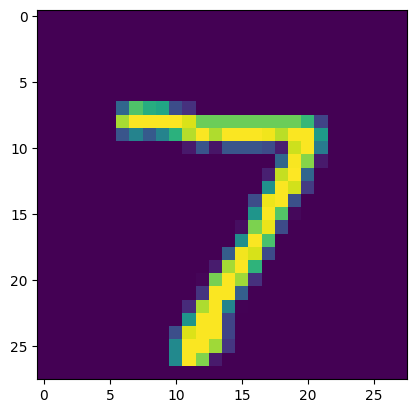

LDA prediction : [7] | Ground truth : 7
RFC prediction : [7] | Ground truth : 7


In [9]:
## Example 

x, label = X_test.loc[0,:].values, y_test.loc[0]

plt.imshow(x.reshape(28,28))
plt.show()

x_pred_lda = lda.predict(x.reshape(1,-1))

print(f"LDA prediction : {x_pred_lda} | Ground truth : {label}")

x_pred_rfc = rfc.predict(x.reshape(1,-1))

print(f"RFC prediction : {x_pred_rfc} | Ground truth : {label}")

# Save LDA model

In [11]:
with open(lda_ckpt, 'wb') as f_out:
    pickle.dump(lda, f_out)

with open(rfc_ckpt, 'wb') as f_out:
    pickle.dump(rfc, f_out)